# Loading libraries

In [2]:
import os
import numpy as np
import pandas as pd
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Loading the data

In [3]:
fose_data_path = "data/FoSE2026-Data.xlsx"

In [4]:
def get_worked_for_se_data(file_path, sheet_name):
    df = pd.read_excel(
    file_path,
    sheet_name=sheet_name,
    header=0,              # Row to use as column names (0 = first row)
    skiprows=6,            # Number of rows to skip at the start
    nrows=500,             # Number of rows to read (optional)
    usecols='B:D',
    engine='openpyxl')
    return df

In [5]:
worked_for_se = get_worked_for_se_data(fose_data_path, 'Q7')
worked_for_se.head(5)

,Unnamed: 1,"What aspect or aspects of the software engineering research community work well, and why?",Practical Impact and relevance to practice/industry
0,192063126,NaN,NaN
1,192065107,In-Person conferences are still a delight for ...,NaN
2,192082119,Mostly open community. Vibrant events. Lots of...,NaN
3,192094513,I would say we do well on empirical studies de...,NaN
4,192101862,NaN,NaN


In [6]:
def get_not_worked_for_se_data(file_path, sheet_name):
    df = pd.read_excel(
    file_path,
    sheet_name=sheet_name,
    header=0,              # Row to use as column names (0 = first row)
    skiprows=6,            # Number of rows to skip at the start
    nrows=500,             # Number of rows to read (optional)
    usecols='B:D',
    engine='openpyxl')
    return df

In [7]:
not_worked_for_se = get_not_worked_for_se_data(fose_data_path, 'Q8')
not_worked_for_se.head(5)

,Unnamed: 1,"What aspect or aspects of the software engineering research community do not work well, and why?",Practical Impact and relevance to practice/industry
0,192063126,NaN,NaN
1,192065107,This is a personal vendetta but we're we're no...,NaN
2,192082119,Reviewing process: - quality of reviews is not...,NaN
3,192094513,Adopting new technologies. Let's say NLP commu...,NaN
4,192101862,NaN,NaN


# Change One thing

In [8]:
def get_one_change_to_make_data(file_path,sheet_name):
    df = pd.read_excel(
    file_path,
    sheet_name=sheet_name,
    header=0,              # Row to use as column names (0 = first row)
    skiprows=6,            # Number of rows to skip at the start
    nrows=500,    
    usecols='B:D',
    engine='openpyxl')
    return df

In [9]:
one_change_to_make = get_one_change_to_make_data(fose_data_path,'Q9')
one_change_to_make.head(5)

,Unnamed: 1,"If you could make one change, what would you change and what outcome from that change would you like to see in the software engineering research community?",Practical Impact and relevance to practice/industry
0,192063126,NaN,NaN
1,192065107,I do away with all of our program committees a...,NaN
2,192082119,NaN,NaN
3,192094513,Be open to adopting new technologies and not t...,NaN
4,192101862,NaN,NaN


# Response & ID

In [10]:
def get_response_id_user_data(file_path, sheet_name):
    df = pd.read_excel(
    file_path,
    sheet_name=sheet_name,
    header=0,              
    nrows=500, 
    usecols='A:L',
    engine='openpyxl')
    return df

In [11]:
response_id_user = get_response_id_user_data(fose_data_path, 'Raw Data')
response_id_user.head()
response_id_user = response_id_user.drop(['Response Status', 'Timestamp (mm/dd/yyyy)', 'Time Taken to Complete (Seconds)'], axis=1)

In [12]:
def get_response_id_user_keyvalue_pair(response_id_user):
    # Inspect the columns to identify the response ID column
    #print("Columns:", response_id_user.columns.tolist())
    #print("\nFirst few rows:")
    response_id_user.head()
    # Create key-value pair: response ID as key, first non-NaN value from same row as value
    # Assuming the first column is the response ID, adjust if needed
    response_id_col = response_id_user.columns[0]  # Change this if response ID is in a different column

    # Create dictionary with response ID as key and first non-NaN value as value
    response_id_dict = {}

    for idx, row in response_id_user.iterrows():
        response_id = row[response_id_col]
    
    # Find first non-NaN value in the row (excluding the response ID column)
        other_cols = [col for col in response_id_user.columns if col != response_id_col]
        non_nan_value = None
    
        for col in other_cols:
            if pd.notna(row[col]):
                non_nan_value = row[col]
                break
    
    # Only add to dict if we found a non-NaN value
        if non_nan_value is not None:
            response_id_dict[response_id] = non_nan_value
    
    return response_id_dict

In [13]:
response_id_user_type = get_response_id_user_keyvalue_pair(response_id_user)
len(response_id_user_type.keys())

278

# Saving extracted data

In [14]:
def extract_responses_of_interest(response_df):
    response_id_text_dict=dict()
    for idx, row in response_df.iterrows():
        response_id=row.iloc[0]
        response_text=row.iloc[1]
        col_of_interest=row.iloc[2]
          
        if  pd.notna(col_of_interest) and str(col_of_interest).strip():  
            response_id_text_dict[response_id] = response_text
            
    return response_id_text_dict

In [15]:
worked_for_se_map = extract_responses_of_interest(worked_for_se)
not_worked_for_se_map = extract_responses_of_interest(not_worked_for_se)
one_change_to_make_map = extract_responses_of_interest(one_change_to_make)

In [16]:
def save_keyword_map_to_file(keyword_map, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        for key, value in keyword_map.items():
            f.write(f"{key}:{value}\n")

In [17]:
save_keyword_map_to_file(worked_for_se_map, "data/RQ1/worked_for_se_map.txt")
save_keyword_map_to_file(not_worked_for_se_map, "data/RQ1/not_worked_for_se_map.txt")
save_keyword_map_to_file(one_change_to_make_map, "data/RQ1/one_change_to_make_map.txt")

# Response Statistics

In [18]:
TOTAL_RESPONDENTS = 280

In [19]:
worked_for_se_ratio = len(worked_for_se_map.keys()) / TOTAL_RESPONDENTS
not_worked_for_se_ratio = len(not_worked_for_se_map.keys()) / TOTAL_RESPONDENTS

In [20]:
A = [worked_for_se_ratio, 1 - worked_for_se_ratio]
B = [not_worked_for_se_ratio, 1 - not_worked_for_se_ratio]

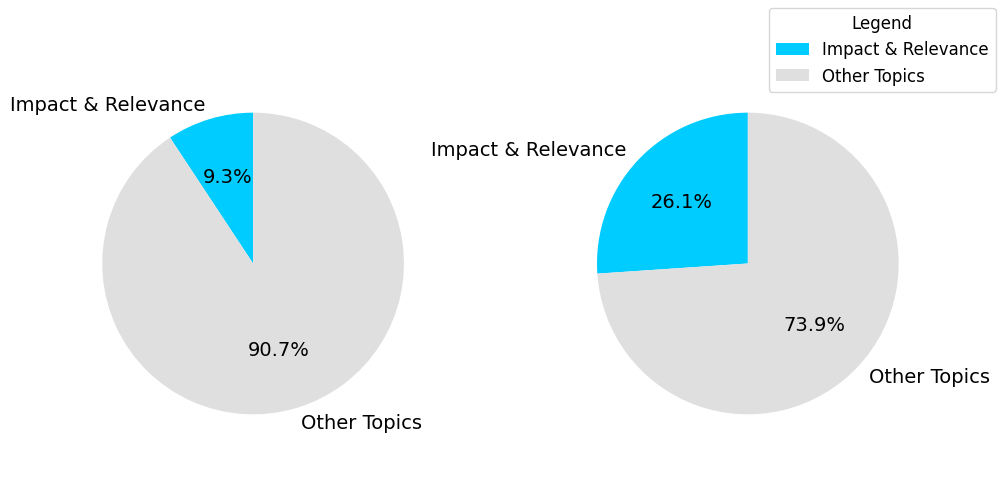

In [21]:
import matplotlib.pyplot as plt
labels = ['Impact & Relevance', 'Other Topics']
titles = ['Worked in SE', 'Not Worked in SE']
data_list = [A, B]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
colors = ['#00ccff', '#dfdfdf']

# Font size settings for pie chart labels, percentages, and titles
label_fontsize = 14
autopct_fontsize = 14
title_fontsize = 14

legend_handles = None
for ax, data, title in zip(axes, data_list, titles):
    wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    for t in texts:
        t.set_fontsize(label_fontsize)
    for at in autotexts:
        at.set_fontsize(autopct_fontsize)
    ax.axis('equal')
    if legend_handles is None:
        legend_handles = wedges

# Add a color legend for the pie slices (once for the whole figure)
fig.legend(legend_handles, labels, title='Legend', loc='upper right', fontsize=12, title_fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# User Demographics

In [22]:
len(response_id_user_type.keys())

278

In [23]:
def capture_user_types(response_ids, response_id_user_type):
    user_types_map = dict()
    for rid in response_ids:
        if rid in response_id_user_type:
            user_type = response_id_user_type[rid]
            if user_type in user_types_map:
                user_types_map[user_type] += 1
            else:
                user_types_map[user_type] = 1
            
    return user_types_map

In [24]:
worked_se_demographics = capture_user_types(worked_for_se_map.keys(), response_id_user_type)
not_worked_se_demographics = capture_user_types(not_worked_for_se_map.keys(), response_id_user_type)

# Demographics statistics

In [25]:
TOTAL_UG = 3
TOTAL_PRACTITIONER = 16
TOTAL_IND_RESEARCHER = 24
TOTAL_POSTDOC= 26
TOTAL_GRAD_STD= 44
TOTAL_NON_TENURED_PROF= 37
TOTAL_TENURED_PROF= 149
OTHER=7

In [26]:
def calculate_demographics_ratio(_demo_map):
    demo_map = _demo_map.copy()
    for key in demo_map:
        if key == 'Untenured university faculty member':
            demo_map[key] = demo_map[key] / TOTAL_NON_TENURED_PROF
        elif key == 'Tenured university faculty member':
            demo_map[key] = demo_map[key] / TOTAL_TENURED_PROF
        elif key == 'Practitioner': 
            demo_map[key] = demo_map[key] / TOTAL_PRACTITIONER
        elif key == 'Industrial researcher':
            demo_map[key] = demo_map[key] / TOTAL_IND_RESEARCHER
        elif key == 'Postdoctoral researcher':
            demo_map[key] = demo_map[key] / TOTAL_POSTDOC
        elif key == 'Graduate student':
            demo_map[key] = demo_map[key] / TOTAL_GRAD_STD
           
    return demo_map

In [27]:
print(worked_se_demographics)
calculate_demographics_ratio(worked_se_demographics)

{'Untenured university faculty member': 3, 'Tenured university faculty member': 15, 'Practitioner': 1, 'Postdoctoral researcher': 2, 'Graduate student': 4, 'Industrial researcher': 1}


{'Untenured university faculty member': 0.08108108108108109,
 'Tenured university faculty member': 0.10067114093959731,
 'Practitioner': 0.0625,
 'Postdoctoral researcher': 0.07692307692307693,
 'Graduate student': 0.09090909090909091,
 'Industrial researcher': 0.041666666666666664}

In [28]:
print(not_worked_se_demographics)
calculate_demographics_ratio(not_worked_se_demographics)

{'Untenured university faculty member': 8, 'Tenured university faculty member': 46, 'Practitioner': 4, 'Graduate student': 7, 'Industrial researcher': 3, 'Postdoctoral researcher': 5}


{'Untenured university faculty member': 0.21621621621621623,
 'Tenured university faculty member': 0.3087248322147651,
 'Practitioner': 0.25,
 'Graduate student': 0.1590909090909091,
 'Industrial researcher': 0.125,
 'Postdoctoral researcher': 0.19230769230769232}

In [29]:
worked_for_se_demo_ratio = calculate_demographics_ratio(worked_se_demographics)
not_worked_for_se_demo_ratio = calculate_demographics_ratio(not_worked_se_demographics)

In [30]:
worked_for_se_demo_ratio

{'Untenured university faculty member': 0.08108108108108109,
 'Tenured university faculty member': 0.10067114093959731,
 'Practitioner': 0.0625,
 'Postdoctoral researcher': 0.07692307692307693,
 'Graduate student': 0.09090909090909091,
 'Industrial researcher': 0.041666666666666664}

In [31]:
not_worked_for_se_demo_ratio

{'Untenured university faculty member': 0.21621621621621623,
 'Tenured university faculty member': 0.3087248322147651,
 'Practitioner': 0.25,
 'Graduate student': 0.1590909090909091,
 'Industrial researcher': 0.125,
 'Postdoctoral researcher': 0.19230769230769232}

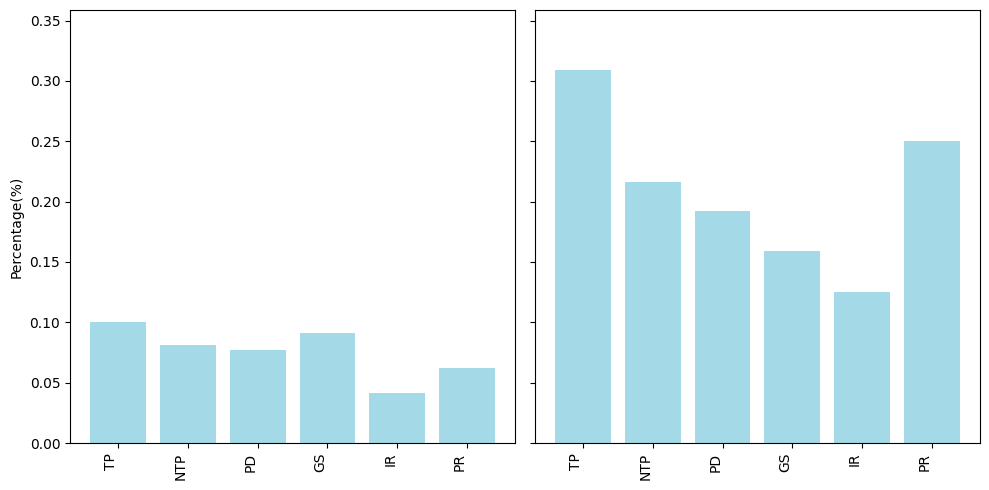

In [32]:
categories = [
    'Tenured university faculty member',
    'Untenured university faculty member',
    'Postdoctoral researcher',
    'Graduate student',
    'Industrial researcher',
    'Practitioner'
]

def vals_from_dict(d):
    return [d.get(cat, 0) for cat in categories]

vals1 = vals_from_dict(worked_for_se_demo_ratio)
vals2 = vals_from_dict(not_worked_for_se_demo_ratio)

ymax = min(1.0, max(max(vals1), max(vals2)) + 0.05)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
x = np.arange(len(categories))

_categories = ["TP", "NTP", "PD", "GS", "IR", "PR"]

for ax, vals, title in zip(axes, [vals1, vals2], titles):
    ax.bar(x, vals, color="#a4dae7")
    ax.set_xticks(x)
    ax.set_xticklabels(_categories, rotation=90, ha='right')
    #ax.set_title(title)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('Percentage(%)' if ax is axes[0] else '')

plt.tight_layout()
plt.show()

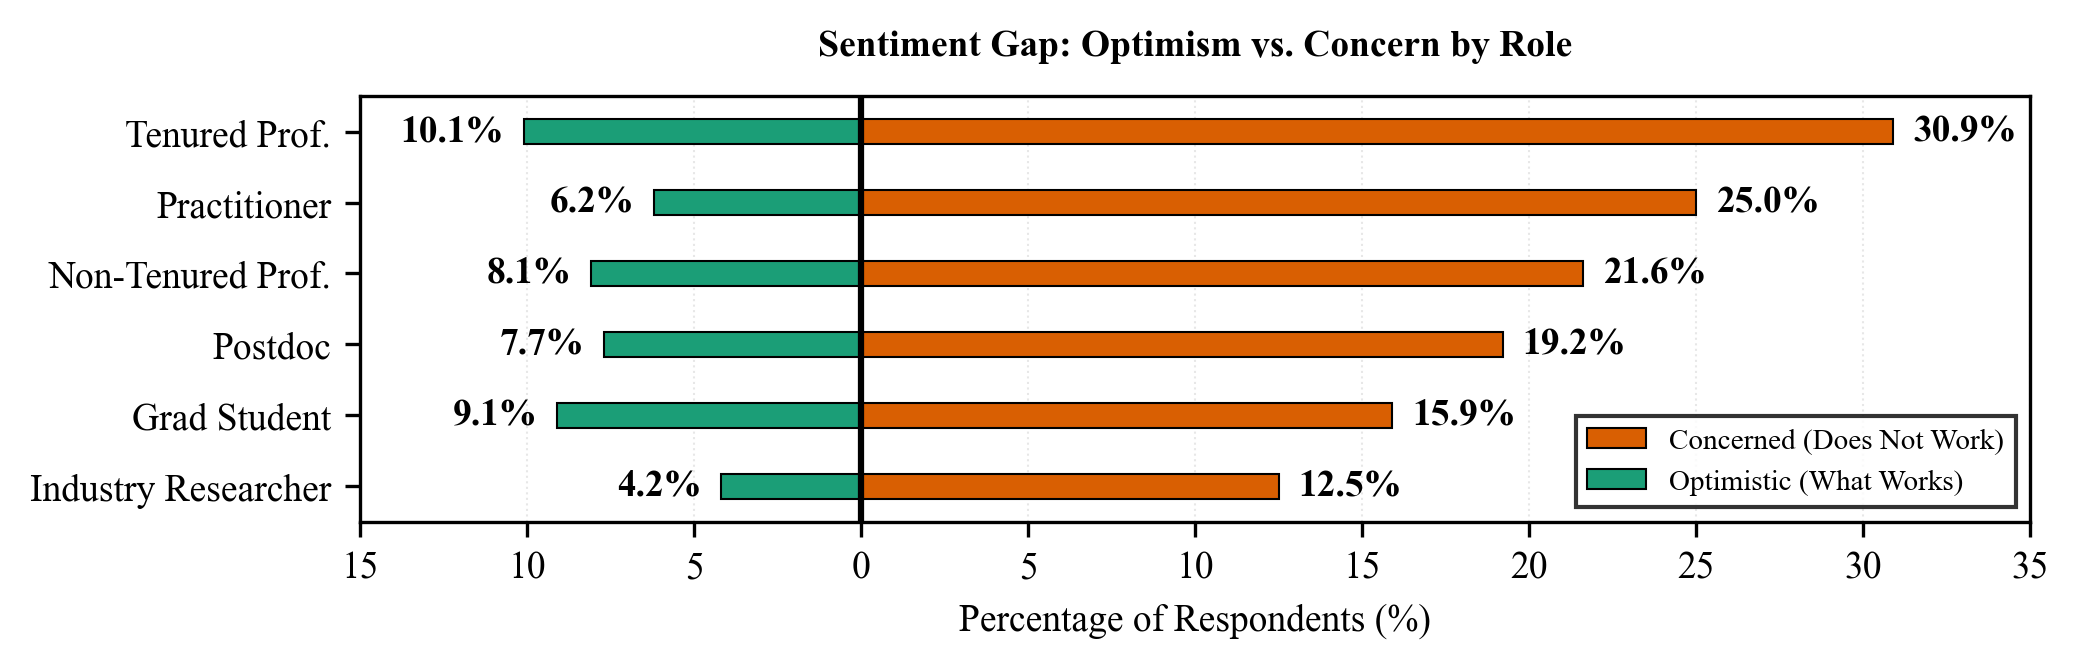

In [46]:
import matplotlib.pyplot as plt
import numpy as np

data_concern_raw = {
    'Untenured university faculty member': 0.21621621621621623,
    'Tenured university faculty member': 0.3087248322147651,
    'Practitioner': 0.25,
    'Graduate student': 0.1590909090909091,
    'Industrial researcher': 0.125,
    'Postdoctoral researcher': 0.19230769230769232
}

data_optimism_raw = {
    'Untenured university faculty member': 0.08108108108108109,
    'Tenured university faculty member': 0.10067114093959731,
    'Practitioner': 0.0625,
    'Postdoctoral researcher': 0.07692307692307693,
    'Graduate student': 0.09090909090909091,
    'Industrial researcher': 0.041666666666666664
}

def plot_diverging_demographics():
    roles_display = [
        'Industry Researcher',
        'Grad Student',
        'Postdoc',
        'Non-Tenured Prof.',
        'Practitioner',
        'Tenured Prof.'
    ]
    
    # Map display names to dictionary keys
    key_map = {
        'Industry Researcher': 'Industrial researcher',
        'Grad Student': 'Graduate student',
        'Postdoc': 'Postdoctoral researcher',
        'Non-Tenured Prof.': 'Untenured university faculty member',
        'Practitioner': 'Practitioner',
        'Tenured Prof.': 'Tenured university faculty member'
    }

    # Extract data in the correct order
    concern_vals = [data_concern_raw[key_map[r]] * 100 for r in roles_display]
    optimism_vals = [data_optimism_raw[key_map[r]] * 100 for r in roles_display]

    # Round values
    concern_vals = [round(v, 1) for v in concern_vals]
    optimism_vals = [round(v, 1) for v in optimism_vals]
    
    # Create negative values for the left side
    optimism_diverging = [-x for x in optimism_vals]

    # Plot settings
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'],
        'font.size': 9,
        'axes.labelsize': 9,
        'axes.titlesize': 9,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'figure.dpi': 300,
    })

    fig, ax = plt.subplots(figsize=(7, 2.3))

    bar_height = 0.35
    y_positions = np.arange(len(roles_display))

    # Plot bars
    ax.barh(
        y_positions, concern_vals,
        height=bar_height,
        color='#d95f02',
        edgecolor='black',
        linewidth=0.5,
        label='Concerned (Does Not Work)'
    )
    ax.barh(
        y_positions, optimism_diverging,
        height=bar_height,
        color='#1b9e77',
        edgecolor='black',
        linewidth=0.5,
        label='Optimistic (What Works)'
    )

    # Set y-axis labels
    ax.set_yticks(y_positions)
    ax.set_yticklabels(roles_display)

    # Set limits and padding
    padding = 0.5
    ax.set_ylim(-padding, len(roles_display) - 1 + padding)
    ax.axvline(0, color='black', linewidth=1.5)
    
    ax.set_xlabel('Percentage of Respondents (%)')
    ax.set_title('Sentiment Gap: Optimism vs. Concern by Role', fontweight='bold', pad=10)

    # X-axis formatting
    ax.set_xlim(-15, 35)
    ax.set_xticks(np.arange(-15, 36, 5))
    ax.set_xticklabels([f"{int(abs(t))}" for t in ax.get_xticks()])

    ax.grid(axis='x', alpha=0.3, linestyle=':', linewidth=0.5)
    ax.set_axisbelow(True)

    # Add text annotations
    for i, (c, o) in enumerate(zip(concern_vals, optimism_vals)):
        # Right annotation
        ax.text(c + 0.6, i, f"{c}%", va='center', ha='left',
                fontsize=9, fontweight='bold')
        # Left annotation (position at -value)
        ax.text(-o - 0.6, i, f"{o}%", va='center', ha='right',
                fontsize=9, fontweight='bold')

    # Legend
    ax.legend(loc='lower right', frameon=True, fontsize=7,
              edgecolor='black', fancybox=False)

    plt.tight_layout()
    plt.show()

plot_diverging_demographics()